# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [9]:
import IPython
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import scipy as sp
from scipy.stats.stats import pearsonr   

import sys
import operator
import time
import math

import warnings
warnings.filterwarnings('ignore')

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [10]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [11]:
print(type(bdata))
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
#print (bdata.DESCR)

<class 'sklearn.datasets.base.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


#### Comment on Boston sklearn dataset
The sklearn dataset by default is of the type: _sklearn.datasets.base.Bunch_. This must to be converted to dataframes for easy manipulation.

In [12]:
#Create Dataframe from the ndarray of input data
print('Data (Input) is of type' , type(bdata.data), '\nInput shape: ', bdata.data.shape)
print('\nPREDICTOR variables')
X_df = pd.DataFrame(data =bdata.data, columns = bdata.feature_names)
X_df.head()

Data (Input) is of type <class 'numpy.ndarray'> 
Input shape:  (506, 13)

PREDICTOR variables


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
#Create Dataframe from the response variable ndarray
print('Target is of type: ' , type(bdata.target) , '\nTarget shape: ', bdata.target.shape)
print('\nRESPONSE variable')
y_df = pd.DataFrame(data =bdata.target, columns = ['MEDV'])
y_df.head()

Target is of type:  <class 'numpy.ndarray'> 
Target shape:  (506,)

RESPONSE variable


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [14]:
#Combine X (input) & y (output) into single dataframe
all_df =  pd.concat([X_df, y_df], axis =1)
print('Overall (predictor and response) dataframe shape: ', all_df.shape)
print('\nCOMBINED dataframe')
all_df.head()

Overall (predictor and response) dataframe shape:  (506, 14)

COMBINED dataframe


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Comment on Overall Dataframes:
These dataframes are *not* to be edited throughout the analysis. They will be used to derive slices for testing, training, validation and model selection.
* X_df   : Contains all the 13 predictor variables (CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT) 
* y_df   : Contains the 1 response variable (MEDV)
* all_df : Contains the combined instances of features and response

---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


In [1]:
#Plot Histogram - MEDV
%matplotlib inline

#Prepare the data
y = y_df.values

#Prepare the plot
plt.figure(figsize=(10,8))
plt.title('Histogram : Median Value of Boston houses (MEDV)', fontsize=14)
plt.xlabel('Median value of Boston house(in 1000 USD)', fontsize=12)
plt.ylabel('Frequency (number of towns)', fontsize=12)
plt.grid(False)

#Plot the data
binwidth = 1 #MEDV is measured in units of 1000$
bin_list = np.arange(min(y), max(y) + binwidth, binwidth)
plt.hist(y, bins= bin_list, facecolor='green', alpha=0.7)

#Remove spines on right and top
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

NameError: name 'y_df' is not defined

#### Interpretation of histogram
Seems like there are quite a few houses in the 20-30k USD range. Houses were cheaper in 1978! The mdeian house value seems to follow a normal distribution across the tows, except for a few outlier towns with very high prices.

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


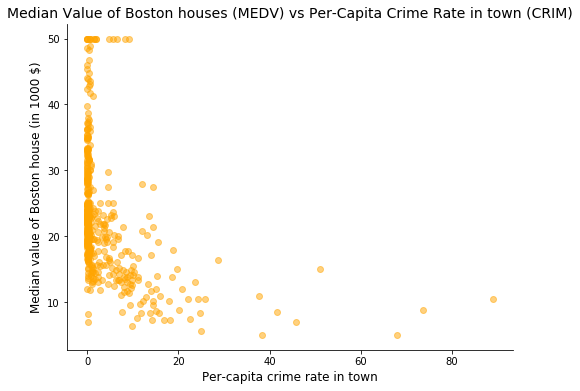


Correlation between house price (MEDV) and Crime Rate (CRIM)
          MEDV      CRIM
MEDV  1.000000 -0.385832
CRIM -0.385832  1.000000


In [16]:
#Plot Scatter= MEDV vs CRIM

#Prepare the data
#y = MEDV values already fetched previously
crim = X_df['CRIM'].values

#Prepare the plot
plt.figure(figsize=(8,6))
plt.title('Median Value of Boston houses (MEDV) vs Per-Capita Crime Rate in town (CRIM)', fontsize=14)
plt.xlabel('Per-capita crime rate in town', fontsize=12)
plt.ylabel('Median value of Boston house (in 1000 $)', fontsize=12)
plt.grid(False)

#Plot the data
plt.scatter(crim, y, color='orange',  alpha=0.5)

#Remove spines on right and top
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#Check for correlation using pandas corr() function 
#Alternate functions np.corrcoef, sp.stats.pearsonr
print('\nCorrelation between house price (MEDV) and Crime Rate (CRIM)')
print(pd.concat([y_df, X_df['CRIM']], axis=1).corr())

#### Interpretation of scatter plot
The correlation in the plot is negative, and has a value of -0.38. This means that a high per-capita crime rate is associated with a smaller median house value in the town. 
The graph also tells us that most tows have very low per-capita crime. The towns that do have high crime rates invariably have very low median house prices. This is logical.

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

#### Aim of visualization:
- Let's see how the median house value is a town can be affected by variables related to **education** and **poverty**.
- For Education, we look at Pupil-Teacher-ratio (PTRATIO) as a metric. Higher PTRATIO is bad because a teacher has to handle many more kids. 
- For Poverty, we choose LSTAT, i,e, percentage of lower status population as a metric.
- Thus, the graph will be faceted in color by PTRATIO, and have LSTAT as the x-axis
- PTRATIO is a continuous variable, so we can categorize a town as HIGH, LOW or MEDIUM in PTRATIO based on the quantiles of the column

In [17]:
print(all_df['PTRATIO'].describe())

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


#### PTRATIO Levels:
(Low    =  < 25%  = 17.4)    
(Medium = 25-75% = 17.4 to 20.2)    
(High   =  > 75% =  20.2)

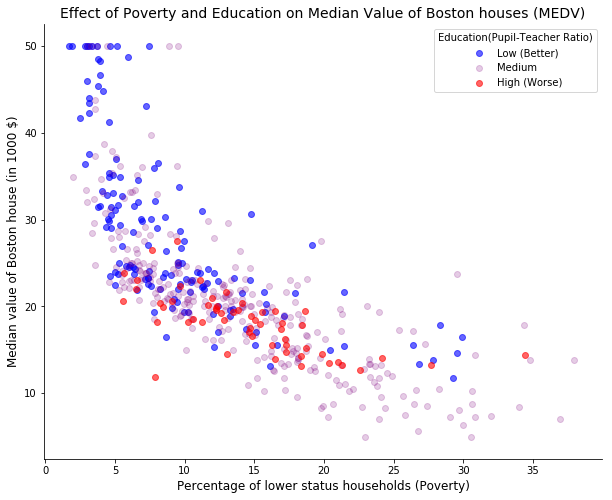

In [18]:
#Awesome Plot
#Plot Scatter= MEDV vs CRIM

#Subset the data
#lstat   = all_df['LSTAT'].values
low_ptr  = all_df.loc[all_df['PTRATIO'] <=17.4]
mid_ptr  = all_df.loc[(all_df['PTRATIO'] >17.4) & (all_df['PTRATIO'] <=20.2)]
high_ptr = all_df.loc[all_df['PTRATIO'] >20.2]

#Prepare the data
x1=low_ptr['LSTAT'].values
y1=low_ptr['MEDV'].values

x2=mid_ptr['LSTAT'].values
y2=mid_ptr['MEDV'].values

x3=high_ptr['LSTAT'].values
y3=high_ptr['MEDV'].values


#Prepare the plot
plt.figure(figsize=(10,8))
plt.title('Effect of Poverty and Education on Median Value of Boston houses (MEDV)', fontsize=14)
plt.xlabel('Percentage of lower status households (Poverty)', fontsize=12)
plt.ylabel('Median value of Boston house (in 1000 $)', fontsize=12)
plt.grid(False)

#Plot the data
plt.scatter(x1, y1, c='blue', alpha=0.6, label='Low (Better)')
plt.scatter(x2, y2, c='purple', alpha=0.2,  label='Medium')
plt.scatter(x3, y3, c='red', alpha=0.6, label='High (Worse)')
plt.legend(loc='best', title='Education(Pupil-Teacher Ratio)')

#Remove spines on right and top
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Interpretation 
- Looking at the shape of the data cluster, we can immediately see a strong negative correlation between LSTAT i.e. percentage of lower status households and the Median House Price in an area. 
- Towns with higher fraction of lower status population tend to have lower median house prices.
- Education is a more subtle difference as denoted with colors.
- Looking at the colors that denote the pupil teacher ratio in a town, the colors chosen are BLUE for top 25% towns (Low pupil to teacher ratio), RED is for bottom 25% towns(High PTRATIO) and lilac color is for the middle 50% of the towns.
- We can see when looking at the top 25% towns(BLUE dots), that they are more densely located in the left of the graph.Hence, towns with good pupil-teacher ratios also seem to have lower Poverty scores.
- Looking at the RED dots, we can see that most of the bottom 25% towns in terms of education have a fair bit of population that is of lower status. 
- In particular, we can see that NONE of the educationally worse-off towns (RED dots) have high median prices.
- This graph thus allows us to understand how both Poverty and Education metrics in a town can have an impact on house prices.

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [19]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Root Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : FLOAT
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6))
2.08
"""

def compute_rmse(predictions , yvalues):
    if(len(predictions) !=len(yvalues)):
        print('Lists of unequal lengths')
        return -1
    
    sum_ee=0
    for (pred, y) in zip(predictions , yvalues):
        e = y - pred
        e2= e*e
        sum_ee = sum_ee+ e2
        
    mse=sum_ee/len(yvalues)
    rmse = np.sqrt(mse)
    return rmse

#Check it out, yo!
print('Verfying RMSE function \nFor predictions(2,2,3) and actual values(0,2,6) \nRMSE = ')
print(compute_rmse((2,2,3),(0,2,6)))

Verfying RMSE function 
For predictions(2,2,3) and actual values(0,2,6) 
RMSE = 
2.08166599947


### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [20]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

In [21]:
#Returns a shuffled form of the input dataframe for a given seed value
def shuffle_df(df, seed=1):
    shuffle_df = df.sample(frac=1, random_state=seed)
    return shuffle_df
    
#Splits a given dataframe into two, without randomization, based on an input fraction (0-1)
def split_df_into_two(df, split_pct=0.5, verbose= False):
    (nrow, ncol) = df.shape
    nrow1 = math.ceil(split_pct*nrow)
    nrow2 = nrow-nrow1
    
    df1 = df.iloc[:nrow1, :]
    df2 = df.iloc[nrow1: ,:]
    
    if(verbose==True):
        print('Row Split Equation : ', nrow, ' = ' ,nrow1 , ' + ', nrow2 )
        print('\nOriginal  dataframe shape : ', df.shape)
        print('First     dataframe shape : ', df1.shape)
        print('Second    dataframe shape : ', df2.shape)    
    return(df1, df2)

In [22]:
#Let's randomize overall dataframe and split into two
new_df = shuffle_df(all_df, 13579)
bdata_train, bdata_test= split_df_into_two(new_df, 0.66)

print('\nTrain data : \n',bdata_train.shape)
print('\nTrain data : \n',bdata_train.head())

print('\nTest  data: \n',bdata_test.shape)
print('\nTest  data: \n',bdata_test.head())


Train data : 
 (334, 14)

Train data : 
          CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
440  22.05110   0.0  18.10   0.0  0.740  5.818  92.4  1.8662  24.0  666.0   
215   0.19802   0.0  10.59   0.0  0.489  6.182  42.4  3.9454   4.0  277.0   
212   0.21719   0.0  10.59   1.0  0.489  5.807  53.8  3.6526   4.0  277.0   
197   0.04666  80.0   1.52   0.0  0.404  7.107  36.6  7.3090   2.0  329.0   
161   1.46336   0.0  19.58   0.0  0.605  7.489  90.8  1.9709   5.0  403.0   

     PTRATIO       B  LSTAT  MEDV  
440     20.2  391.45  22.11  10.5  
215     18.6  393.63   9.47  25.0  
212     18.6  390.94  16.03  22.4  
197     12.6  354.31   8.61  30.3  
161     14.7  374.43   1.73  50.0  

Test  data: 
 (172, 14)

Test  data: 
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
432  6.44405   0.0  18.10   0.0  0.584  6.425  74.8  2.2004  24.0  666.0   
253  0.36894  22.0   5.86   0.0  0.431  8.259   8.4  8.9067   7.0  330.0   
369  5.6699

#### Comment on Splitting data into training and test set
The aim with the two functions is to create a re-usable and effective way to create test/train splits.
Note that both the features and output an
* shuffle_df() : Takes a dataframe and seed value (default=1) to return the shuffled version of the dataframe . The indexes of the original rows are shuffled along with the row data.

* split_df_into_two() : Takes a dataframe and split_percentage(default = 50-50) and two dataframes with rows sliced in the expected ratio.

* bdata_train: Dataframe with input features and response variable for "Training" set = 334 rows
* bdata_test : Dataframe with input features and response variable for "Test"  set = 172 rows

### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

#### Create Baseline Model

In [23]:
#Create baseline data
mean_train_response = bdata_train['MEDV'].mean()   #Always predict average value of training response 
(nrow_train, _) = bdata_train.shape

y_baseline_df = pd.DataFrame(mean_train_response, index=list(range(nrow_train)), columns=['MEDV'])

print('BASELINE MODEL\nAlways predicts  : ',mean_train_response)
print('Number of training data instances:', nrow_train)
print('Shape of Baseline Model Predictions :' , y_baseline_df.shape)
print(y_baseline_df.head())

BASELINE MODEL
Always predicts  :  22.045808383233524
Number of training data instances: 334
Shape of Baseline Model Predictions : (334, 1)
        MEDV
0  22.045808
1  22.045808
2  22.045808
3  22.045808
4  22.045808


#### Baseline Model Evaluation : RMSE

In [24]:
#Use RMSE on Training and Testing data
baseline_train_error = compute_rmse(bdata_train['MEDV'].values, [mean_train_response]*nrow_train)
print('Train error  : ', baseline_train_error)

nrow_test, _ = bdata_test.shape
baseline_test_error = compute_rmse(bdata_test['MEDV'].values, [mean_train_response]*nrow_test)
print('Test error   : ', baseline_test_error)

Train error  :  8.57443441541
Test error   :  10.3092622563


#### Comments on Baseline Model Performance
We expect the test error to be much higher than training error, as the model is fit on the seen training data, and cannot perform as well on the test data. In general, we should try to do better than the baseline model, since it is a good benchmark to check our model's performance

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.

Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [192]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(5,9),1)
7

"""
def distance(x1, x2, L=1):
    sum_dist=0
    for(ai,bi) in zip(x1, x2):
         sum_dist += pow(abs(ai-bi) ,L)

    dist= pow(sum_dist,float(1)/L)
    return np.asarray(dist)

print('\nTesting distance function')
print (distance((3,4),(5,9),1) )
print (distance((3,4),(5,9),2) )
print (distance([3,4],[5,9],1) )




Testing distance function
7.0
5.385164807134504
7.0


#### Distance Function for KNN Algorithm

In [193]:
def good_distance(x1, x2, l=2):
    arr1 =np.asarray(x1)
    arr2 =np.asarray(x2)
    
    ax = 1 if arr1.ndim >1  else 0 
    dist = np.power(np.sum(np.abs((arr1 - arr2)**l),ax),1/l)
   
    return(dist)

#### Comment on  distance function
* The distance function works as long as the inputs are lists, tuples etc. 
* The lists are expected to have the same length, i.e. same number of dimensions in hyperspace. 
* Since the above function cannot find the distance between Series or DataFrame objects, we will write an improved custom function to find the L-norm distance between two dataframes with same column names.
* We will use good_distance function for KNN algorithm

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


#### Basic Nearest Neighbor Algorithm (1-NN)
1. Create a function to find the nearest neighbor
2. Create a function to map the nearest neighbors index to the corresponding response value
3. Calculate RMSE

#### Find Nearest Neighbor's Index from Training Set for a given Test Set Instance

In [32]:
#Returns index of the closest element to a given point 'q' in a m-Dimensional space of points 'p' based on L-norm distance metric
#p and q are lists of m-dimensions (m features) (equivalent to vectors with m dimensions)
#Shortcut: df.values.tolist() converts rows into lists, but doesn't contain index
def find_nearest_index(points_df, q, L=1, verbose = False):
    if(verbose==True):
        print('\nUsing L-' , L, ' norm distance metric')
        print('\nTest q type:', type(q))
        print('\nTest q:', q)
        print('\nTrain points_df type:\n', type(points_df))
        #print('\n and Train points_df:\n', points_df) #too much
        print('\nSeries    => Single Column Predictor')
        print('\nDataFrame => Multi  Column Predictor')
    
    min_dist = sys.maxsize  #Minimum must be smaller than this
    nearest = 0
    
    if isinstance(points_df, pd.Series):
        for row in points_df.iteritems(): #Iterate over rows of Series
            index, data = row
            p = [data]  #Convert Series row's values to list 
            #print('\np = ', p)
            #print(type(p)) gives list
            dist = distance(p, q, L) #print(type(p)) Both p and q should be list of Float!
            if(dist < min_dist):
                min_dist = dist
                nearest = index
    else:
        if isinstance(points_df, pd.DataFrame):
            #print('About to process distances! \n')
            #print('\nTest point q is : ' , q) #q is a list
            #print(type(q))
            for row in points_df.iterrows(): #Iterate over rows of dataframe
                index, data = row
                p = data.tolist() #Convert df row's values to list 
                #print('\nTraining point p = ', p)
                #print(type(p)) #gives list
                dist = distance(p, q, L)
                if(dist < min_dist):
                    min_dist = dist
                    nearest = index
    #print('\nNearest for : ' , q, ' is at index ', nearest ,' with value: ', points_df.loc[nearest])
    return nearest

#### 1- Nearest Neighbor Method

In [33]:
#Finds nearest neighbour based on a more than one feature 
#returns Test predictors df, and nearest neighbours for given test_index
#No response variables required, yet!
def basic_nearest_neighbor(X_train, X_test, predictors, nn_col='NearestIndex', L=1, verbose=False, time_it=False): #x is a single    
    if(time_it == True): #Show time to run only when needed
        print('\nBasic 1-Nearest Neighbour L-', L )
        tic=time.time()
    
    if len(predictors) == 0:
        predictors = X_train.columns.tolist()
    p=len(predictors)
    
    #Single feature based prediction
    if p == 1:
        input_col = predictors[0]
        result_df = X_test[[input_col]].copy()
        
        #Find nearest neighbors for each test instance among all training points using simple_search
        points_df = X_train[input_col]
        nn_function = lambda x : find_nearest_index(points_df, [x], L=L, verbose = False)
        
        result_df[nn_col]= X_test[input_col].apply(nn_function)#No need for axis=1, since it's a single column            
        result_cols = [input_col, nn_col] 
    
    #Multi feature based prediction
    else:
        points_df = X_train.ix[:,predictors]
        result_df = X_test[predictors].copy()
        #print('Type of input : ' , type(points_df), ' ', type(result_df))
        
        #list(row) is list, row is Series 
        nn_multi_function = lambda row : find_nearest_index(points_df, list(row), L=L, verbose = False)
        result_df[nn_col]= result_df.apply(nn_multi_function, axis=1) #Needs axis=1        
        result_cols = predictors + [nn_col]

    #Print results and return
    if(verbose == True):
            print('\nUsing L-' , L, ' norm distance metric')
            print('Predictor column(s) : ' , predictors)  
            print('\n Here is the output header! \n')
            print(result_df.head())
    
    if(time_it == True):
        toc = time.time()
        print("1-NN with ", p , " features, Test set:", X_test.shape, ', Train set:', X_train.shape , " took ", (toc-tic), "seconds.")
    
    return result_df, predictors

#### 1-NN Prediction for test points

In [34]:
#X_test_nn is df of predictor columns, and calculated neighbor index, y_train is Series
#Returns a Series with same name as y_train, with predicted values
def nearest_neighbor_prediction(Test_nn, y_train, nn_col='NearestIndex', time_it=False): 

    #Response Column name should be same for train and test
    response_col = y_train.name        

    if(time_it==True):
        print('\nResponse column: ', response_col)
        tic=time.time()

    #Test Predictions df: row indexes of input test data, columns of training response variable
    test_predictions = pd.DataFrame(index=Test_nn.index.tolist(), columns  = [response_col])
    test_predictions[response_col] = Test_nn[nn_col].apply(lambda idx: y_train.get_value(idx)) #get element at index for Series
    
    if(time_it == True):
        toc = time.time()
        print("1-NN Prediction for Test points:", Test_nn.shape, ' and Train Response:', y_train.shape , " took ", (toc-tic), "seconds.")
    return test_predictions

#### Prepare data to test 1-NN

In [35]:
#Set up for execution
X_train= bdata_train.ix[:, bdata_train.columns != 'MEDV']
y_train = bdata_train['MEDV']

X_test= bdata_test.ix[:, bdata_test.columns != 'MEDV']
y_test = bdata_test['MEDV']

Xy_train = pd.concat([X_train, y_train]) #Same as bdata_train
Xy_test = pd.concat([X_test, y_test]) #Same as bdata_test


#### Run 1-NN with 2 features (RM & CRIM)

In [36]:
#Run basic model for 1 feature
predictors=['RM', 'CRIM']
test_nn , _ = basic_nearest_neighbor(X_train, X_test, predictors, L=2, verbose = False, time_it=True) 
print(test_nn.head())


Basic 1-Nearest Neighbour L- 2
1-NN with  2  features, Test set: (172, 13) , Train set: (334, 13)  took  4.032604217529297 seconds.
        RM     CRIM  NearestIndex
432  6.425  6.44405           475
253  8.259  0.36894           233
369  6.683  5.66998           481
480  6.242  5.82401           442
181  6.144  0.06888           293


In [37]:
model_1_preds = nearest_neighbor_prediction(test_nn , y_train, time_it=True)
print(model_1_preds.head())


Response column:  MEDV
1-NN Prediction for Test points: (172, 3)  and Train Response: (334,)  took  0.008002281188964844 seconds.
     MEDV
432  13.3
253  48.3
369  23.7
480  18.4
181  23.9


#### Comparing predictions with actual results (+ caveat)
Note: The results of predictions are a dataframe, but the test data responses are a pandas Series.

In [38]:
print('\nPredicted Values: ', model_1_preds.shape)
print(type(model_1_preds))
print(model_1_preds.head())

print('\nActual Values: ', y_test.shape)
print(type(y_test))
print(y_test.head())


Predicted Values:  (172, 1)
<class 'pandas.core.frame.DataFrame'>
     MEDV
432  13.3
253  48.3
369  23.7
480  18.4
181  23.9

Actual Values:  (172,)
<class 'pandas.core.series.Series'>
432    16.1
253    42.8
369    50.0
480    23.0
181    36.2
Name: MEDV, dtype: float64


#### RMSE for Model #1:  1-NN with two features

In [39]:
rmse = compute_rmse(model_1_preds['MEDV'].values, y_test.values)
print(rmse)
#print(rmse/y_train.mean()) Coefficients

7.40172041598


**Answer ** 
- Mean RMSE of this model is 7.40172041598
- Time to run this model is  4.03 seconds

### Plots for Model #1: 1-NN with two features

#### Line plot

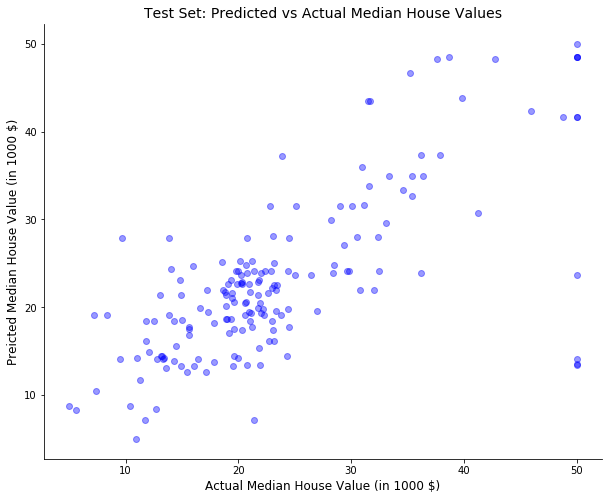

In [40]:
%matplotlib inline
#Plot Predicted vs Actual for Test Data)

#Prepare the data
y1 = y_test.values
y2 = model_1_preds['MEDV'].values

#Prepare the plot
fig = plt.figure(figsize=(10,8))
plt.title('Test Set: Predicted vs Actual Median House Values', fontsize=14)
plt.xlabel('Actual Median House Value (in 1000 $)', fontsize=12)
plt.ylabel('Preicted Median House Value (in 1000 $)', fontsize=12)

#plot the data
plt.scatter(y1, y2, c='blue', alpha = 0.4,  label="Predicted vs Actual response")

#Remove spines on right and top
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### Plot Interpretation

We can see a fairly positive correlation between the predicted responses and the actual values. However, there's a fair bit of jitter in the graph, and it tells us that there can be a better model with higher correlation out there.

#### Extra Plot: Checking Prediction Error for feature  number of rooms (RM)

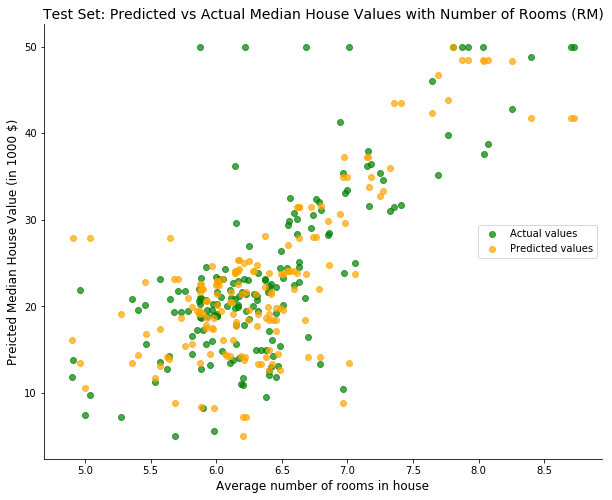

In [41]:
#Plot of prediction error vs Per-capita crime rate (CRIM) input
#Prepare the data
x = X_test['RM'].values
y1 = y_test.values
y2 = model_1_preds['MEDV'].values

#Prepare the plot
fig = plt.figure(figsize=(10,8))
plt.title('Test Set: Predicted vs Actual Median House Values with Number of Rooms (RM)', fontsize=14)
plt.xlabel('Average number of rooms in house', fontsize=12)
plt.ylabel('Preicted Median House Value (in 1000 $)', fontsize=12)

#plot the data
plt.scatter(x, y1, color='green', alpha = 0.7, label="Actual values")
plt.scatter(x, y2, color ='orange', alpha =0.7, label="Predicted values")
plt.legend(loc='center right')

#Remove spines on right and top
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### Plot Interpretation
The model over-predicts more often when the number of rooms in the house are very low, and the model underpredicts a little, when the number of rooms in a house is very high. That said, this plot is not very useful.

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [195]:
"""
These functions normalize a test and training data set based on the mean and standard deviation of the training set.
The dataframe is normalized based on each column's own mean and standard deviation.
"""
def normalize_column(col, mean = '', std = '' ):
    if(mean ==''):
        mean = col.mean()
        std = col.mean()
        
    norm_col = (col - mean) / std
    return (norm_col, mean, std)

#Expects input dataframes
#Caution, normalization should be done to numerical columns only
#Response Variable should NOT be normalized
def normalize_df(train_data, test_data):
    
    #Two ways of getting df column names in list
    train_col_names = list(train_data.columns.values)    
    test_col_names  = list(test_data.columns.values)
    #print(train_col_names)
    #print(test_col_names)
    
    train_dict= {}#stores Key Value pair training column_name paired with tuple (mean, std) for column
    
    #Create dataframes for normalization, with same indexes as train, test 
    train_data_norm = pd.DataFrame(index=train_data.index.tolist(), columns=train_col_names)
    test_data_norm  = pd.DataFrame(index=test_data.index.tolist() , columns=test_col_names)
    
    #Store the mean and std of training data columns
    for col in train_col_names:
        (norm_col, m, s) = normalize_column(train_data[col])
        train_data_norm[col] = norm_col
        train_dict[col] = (m,s)
    
    #Normalize test data with mean and std of training data columns
    for col in test_col_names:
        (m,s) = train_dict[col]
        (norm_col, _, _) =normalize_column(test_data[col], m, s)
        test_data_norm[col] = norm_col
    
    return train_data_norm, test_data_norm

#Doing proper normalization

In [196]:
print('\nNOTE: Response variables do not need to be normalized. Only input features do.\n')
X_train_norm, X_test_norm = normalize_df(X_train, X_test)
#print('\nTraining Data (No Response variable)\n', X_train.head())
#print('\nNormalized Training Data\n', X_train_norm.head())
#print('\nTest Data      (No Response variable)\n', X_test.head())
#print('\nNormalized Test Data\n', X_test_norm.head())


NOTE: Response variables do not need to be normalized. Only input features do.



In [197]:
#Create Combined Normalized columns
Xy_train_norm = pd.concat([X_train_norm, y_train]) #Same as bdata_train normalized
Xy_test_norm = pd.concat([X_test_norm, y_test])

#### Running basic model with NORMALIZED data (RM, CRIM)

In [198]:
#Run basic model for 2 features  after Normalization
cols=['RM', 'CRIM']
test_norm_nn,_  = basic_nearest_neighbor(X_train_norm, X_test_norm, predictors=cols, L=2, verbose= False, time_it=True) 
print(test_norm_nn.head())


Basic 1-Nearest Neighbour L- 2
1-NN with  2  features, Test set: (172, 13) , Train set: (334, 13)  took  3.4111835956573486 seconds.
           RM      CRIM  NearestIndex
432  0.029742  0.836837           475
253  0.323679 -0.894836           233
369  0.071092  0.616193           481
480  0.000412  0.660099           486
181 -0.015294 -0.980366            87


In [199]:
model_2_preds = nearest_neighbor_prediction(test_norm_nn , y_train, time_it=True)
print(model_2_preds.head())


Response column:  MEDV
1-NN Prediction for Test points: (172, 3)  and Train Response: (334,)  took  0.007220268249511719 seconds.
     MEDV
432  13.3
253  48.3
369  23.7
480  19.1
181  22.2


#### RMSE calculation

In [201]:
nrmse = compute_rmse(model_2_preds['MEDV'].values, y_test.values)
range_medv = y_test.max()-y_test.min()
mean_medv  = y_test.mean()

print(nrmse)
#print('Range : ', nrmse*range_medv )
#print('Mean  : ', nrmse*mean_medv )

7.45404135742


#### Comments:
- RMSE after normalization = 7.45404135742

- The RMSE is slightly higher now. Earlier we were using non-normalized data that was not scaled. Now we have scaled the test-data using the training data means and standard deviations. 
- However, this difference is not significantly big.
- The advantage of normalization is that we can be surer about the distance function not being vastly impacted by columns with large ranges.
- This model takes around 3.4 seconds, which is fairly faster than before.

### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [49]:
'''
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
6 - AGE      proportion of owner-occupied units built prior to 1940
9 - TAX      full-value property-tax rate per $10,000
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

'''

'\n3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n5 - NOX      nitric oxides concentration (parts per 10 million)\n6 - AGE      proportion of owner-occupied units built prior to 1940\n9 - TAX      full-value property-tax rate per $10,000\n11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n\n'

#### Custom method to run and test a model for given features and distance
We will optimize models using normalized data starting now!! 

In [82]:
def validate_1NN_model(X_train, X_test, y_train, y_test, predictors, L=1, verbose= False, plot_data = False):
    print('Features : ', predictors)
    print('Distance : L-', L)
    test_neighbors, _ = basic_nearest_neighbor(X_train, X_test, predictors, L=L, verbose=verbose) 
    model_preds = nearest_neighbor_prediction(test_neighbors , y_train)
    rmse = compute_rmse(model_preds['MEDV'].values, y_test.values)
    print('RMSE     : ', rmse)
    print('----------------------------\n')
    
    if(plot_data == True):
        #Prepare the data
        y1 = y_test.values
        y2 = model_preds['MEDV'].values

        #Prepare the plot
        fig = plt.figure(figsize=(12,9))
        plt.title('Visualize Model: Predicted vs Actual Median House Values', fontsize=14)
        plt.xlabel('Actual Median House Value (in 1000 $)', fontsize=12)
        plt.ylabel('Preicted Median House Value (in 1000 $)', fontsize=12)
        

        #plot the data
        label_str = 'Distance: L-',L
        legend_str = 'Model Features: ', predictors
        plt.scatter(y1, y2, c='purple', alpha = 0.5,  label=label_str)
        plt.legend(title = legend_str, loc='best')

        #Remove spines on right and top
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        

#### Running many models


 Running 1-NN models with different L and features

Features :  ['AGE', 'B']
Distance : L- 1
RMSE     :  11.9261730933
----------------------------

Features :  ['AGE', 'B']
Distance : L- 2
RMSE     :  12.0057762261
----------------------------

Features :  ['PTRATIO', 'NOX']
Distance : L- 1
RMSE     :  8.43056454839
----------------------------

Features :  ['PTRATIO', 'NOX']
Distance : L- 2
RMSE     :  8.43056454839
----------------------------

Bad model with 2 features time:  3.825288772583008  seconds.


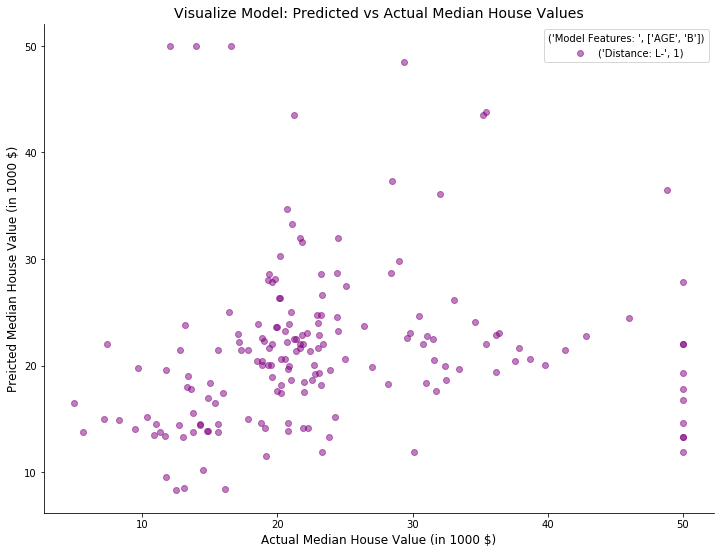

In [204]:
X_tr= X_train_norm
y_tr= y_train
X_te = X_test_norm
y_te = y_test

print('\n Running 1-NN models with different L and features\n')
cols = ['AGE', 'B']
L=1
tic=time.time()
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False, plot_data=True)
toc=time.time()

L=2
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)


cols = ['PTRATIO', 'NOX']
L=1
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)
L=2
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)

print('Bad model with 2 features time: ', toc-tic, ' seconds.')


#### Comment:
Age and B alone are terrible predictors, with a worse RMSE than baseline model!

Features :  ['CHAS', 'NOX', 'AGE']
Distance : L- 1
RMSE     :  9.5057081994
----------------------------

Features :  ['CHAS', 'NOX', 'AGE']
Distance : L- 2
RMSE     :  9.58145920333
----------------------------

Features :  ['CHAS', 'NOX', 'TAX', 'B']
Distance : L- 1
RMSE     :  7.3557365685
----------------------------

Features :  ['CHAS', 'NOX', 'TAX', 'B']
Distance : L- 2
RMSE     :  7.32910730945
----------------------------

Features :  ['PTRATIO', 'LSTAT', 'CRIM', 'RM']
Distance : L- 1
RMSE     :  6.59702187918
----------------------------

Features :  ['PTRATIO', 'LSTAT', 'CRIM', 'RM']
Distance : L- 2
RMSE     :  6.70678673972
----------------------------

Good model with 4 features time:  3.6528549194335938  seconds.


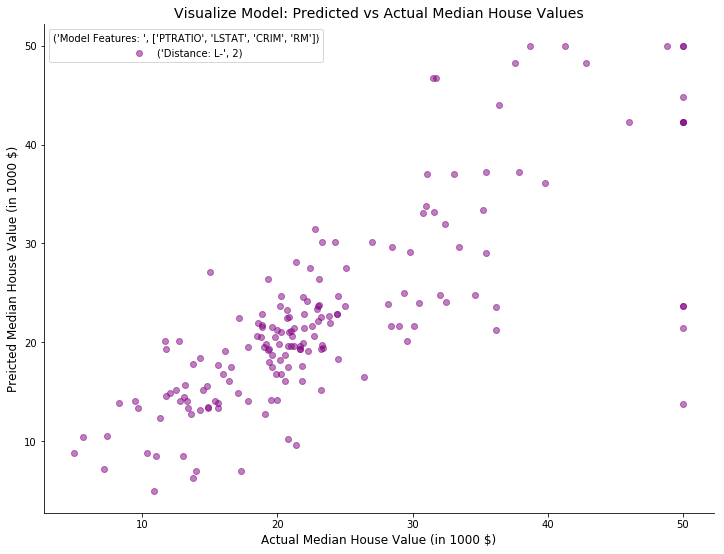

In [205]:

cols = ['CHAS', 'NOX', 'AGE']
L=1
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)
L=2
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)

cols = ['CHAS', 'NOX', 'TAX', 'B']
L=1
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)
L=2
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)

cols = ['PTRATIO', 'LSTAT', 'CRIM', 'RM']
L=1
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False)

tic=time.time()
L=2
validate_1NN_model(X_tr, X_te, y_tr, y_te, cols, L=L, verbose=False, plot_data=True)
toc=time.time()
print('Good model with 4 features time: ', toc-tic, ' seconds.')

#### Comments
- One of the best models uses features ['PTRATIO', 'LSTAT', 'CRIM', 'RM'] and L-2 distance
- This above plot's model has the lowest RMSE seen yet. 
- The timing for the models varies, but fluctuates between 3- 5 seconds depending upon the number of features. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

#### Cross Validation occurs with all the labels (X & Y)
1. Shuffle the data (if needed)
2. Create 10 equally spaced Folds (K=10) df1[] to df10 (store dictionary of df, indexed by Fold number)
3. Now do 10 times
    - validation_set = df[i], train_set = rest
    - predictors = [CRIM, RM]
    - run improved_nearest_neighbour
    - find predictions
    - compute rmse(predictions, actual)
4. Find mean value of list of RMSE
5. Return mean val


In [180]:
def Kfold_cross_validation(data, response_col, predictors=[], 
                           folds = 10, L=1, fold_type='1NN', K =1,
                           shuffle=False, seed=1 , 
                           verbose=False, time_it= False):
    
    if(verbose == True):
        print('\nCROSS-VALIDATION')
        print('\nNeighbor Algorithm : ' , fold_type)
        print('Number of neighbors: ' , K)
        print('Model Features     : ',predictors)
        print('Distance Metric    : L-',L,'norm')
        print('Shuffle data ?   : ' , shuffle,'\n')
    
    if(shuffle==True):
        df = data.shuffle(random_state=seed)
    
    rmse_list = []
    df = data
    nrow,_ = data.shape
    
    i = 1
    span = range(0, nrow)
    while(i <= folds): #Run folds times
        _, start, end = fold_i_of_k(span, i, folds)
        validation_set = data.iloc[start:end , :]                    #Contains X & y
        training_set = data[~data.index.isin(validation_set.index)]  #Contains X & y
        
        #Reset Indexes to save this program!
        training_set = training_set.reset_index(drop=True)
        validation_set = validation_set.reset_index(drop=True)
        #print('Validation Set :', start,' to ', end)
         
        if fold_type =='1NN': #Run the Nearest Neighbour algorithm
            validation_response = validation_set[response_col]
            training_response = training_set[response_col]
            
            validation_nn,_ = basic_nearest_neighbor(training_set, validation_set, predictors, L=L, verbose = False)
            predicted_response = nearest_neighbor_prediction(validation_nn, training_response)
            
            rmse_out = compute_rmse(predicted_response.values, validation_response.values)
            rmse= rmse_out[0] #Converting list of float to float
        
        elif fold_type =='KNN': #Run the KNN algorithm
            predicted_response, rmse = k_nearest_neighbors(training_set, validation_set, response_col, predictors, L=L,K=K)
    
        
        #Store RMSE
        rmse_list.append(rmse)
        if(verbose==True):
            print('Fold ',i,' of ',folds, ' : RMSE = ',rmse)

        i = i+1
        
    if(verbose==True):
        print('\nMean RMSE = ', np.mean(rmse_list))
        
    return np.mean(rmse_list), rmse_list 

In [169]:
def fold_i_of_k(dataset, i, k):
    n = len(dataset)
    return dataset[n*(i-1)//k : n*i//k], n*(i-1)//k, n*i//k

#### Test the Cross-validate function with 1-NN and 10 folds

In [167]:
X_norm_df, _ = normalize_df(X_df, X_test)
data = pd.concat([X_norm_df, y_df], axis=1)
response_col = 'MEDV'
predictors = ['CRIM', 'RM']
mean_rmse, _ = Kfold_cross_validation(data, response_col, predictors, folds = 10, L=2, shuffle=False, verbose=True)


CROSS-VALIDATION

Neighbor Algorithm :  1NN
Number of neighbors:  1
Model Features     :  ['CRIM', 'RM']
Distance Metric    : L- 2 norm
Shuffle data ?   :  False 

Validation Set : 0 - 50
Fold  1  of  10  : RMSE =  5.69570013256
Validation Set : 50 - 101
Fold  2  of  10  : RMSE =  4.07801374181
Validation Set : 101 - 151
Fold  3  of  10  : RMSE =  4.78750456919
Validation Set : 151 - 202
Fold  4  of  10  : RMSE =  9.00503127342
Validation Set : 202 - 253
Fold  5  of  10  : RMSE =  5.5575244877
Validation Set : 253 - 303
Fold  6  of  10  : RMSE =  5.03229569878
Validation Set : 303 - 354
Fold  7  of  10  : RMSE =  4.06525208441
Validation Set : 354 - 404
Fold  8  of  10  : RMSE =  11.8588363679
Validation Set : 404 - 455
Fold  9  of  10  : RMSE =  13.2408310858
Validation Set : 455 - 506
Fold  10  of  10  : RMSE =  9.6023996184

Mean RMSE =  7.292338906


#### Comment on Mean RMSE via Train/Test Split and  Cross-Validation
* Using the same hyperparameters (e.g. L-2 norm), we found that mean RMSE reported by Cross-validation is around 7.29 when using the entire dataset of 506 rows.
* This is comparable but lesser than the RMSE reported in the training/test split method.
* The reasons for the difference can be due to more data being used in the Cross-Validation approach which provides a more robust estimate of test error.
* Cross validation helps us perform better on generalized and unseen data

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

#### Find the distance of a test point to all training data instances

In [194]:
#Calculates the closest neighbor for a given test point and training data
def find_neighbor_distances(test_points, train_data, predictors,L):
    train_features = train_data.loc[:,predictors]
    temp_dist = good_distance(test_points,train_features, L)  #Use improved distance function
    
    #Extracts the minimum value and stores the Median price for that index
    return(temp_dist)

#### KNN Algorithm : Find neighbors for all test points, calculate RMSE

In [174]:
def k_nearest_neighbors(train_data, test_data, response_col, predictors, L=1,K=1, verbose=False):
    predictions = []
    train_response = train_data.loc[:][response_col]
    #print('len1=',len(train_response))
    nrow_train = len(train_data)
    
    for index, row_data in test_data.iterrows(): 
        temp_test_df = pd.DataFrame(pd.concat([row_data.loc[predictors]]*nrow_train,ignore_index=True,axis=1)).T
        
        #Fetch Distance array     
        distance_arr = pd.Series(find_neighbor_distances(temp_test_df, train_data, predictors,L=L))
        #print('len2=',len(distance_arr))
        
        #Concatenates the train target and distance dataframes and sort them to find the k nearest neighbors
        dist_output = pd.concat([distance_arr,train_response],axis=1)
        dist_output.columns = ["Distance",response_col]
        #print(dist_output) #yuuuge
        dist_output = dist_output.sort_values('Distance',ascending=True)
        
        predicted_val = np.mean(dist_output.iloc[:K,1])
        predictions.append(predicted_val)
  
    predictions = np.array(predictions)
    test_response = test_data.loc[:][response_col]
    rmse = compute_rmse(predictions,test_response)

    if(verbose==True):
        print('\nUsing L-' , L, ' norm distance metric')
        print('\nTest point type:', type(test_data))
        print('\nTest point:', test_data)
        print('\nTrain set features type:\n', type(X_train))
        #print('\n and Train points_df:\n', train_features_df) #too much
        print('\nSeries    => Single Column Predictor')
        print('\nDataFrame => Multi  Column Predictor')
 
    return(predictions,rmse)

#### Checking CV Function :  1-NN Prediction, 3 Folds

In [177]:
X_norm_df, _ = normalize_df(X_df, X_test)
data = pd.concat([X_norm_df, y_df], axis=1)
response_col = 'MEDV'
predictors = ['CRIM', 'RM']
print(data.shape)

#Fyi: 1 fold isn't working
mean_rmse, rmse_list = Kfold_cross_validation(data, response_col, predictors, folds=3, fold_type='KNN', L=2, shuffle=False, verbose=True)
print(rmse_list)

(506, 14)

CROSS-VALIDATION

Neighbor Algorithm :  KNN
Number of neighbors:  1
Model Features     :  ['CRIM', 'RM']
Distance Metric    : L- 2 norm
Shuffle data ?   :  False 

Validation Set : 0  to  168
Fold  1  of  3  : RMSE =  5.75550461153
Validation Set : 168  to  337
Fold  2  of  3  : RMSE =  6.5872343821
Validation Set : 337  to  506
Fold  3  of  3  : RMSE =  7.97053003962

Mean RMSE =  6.77108967775
[5.7555046115291519, 6.5872343821010144, 7.9705300396163121]


#### Checking CV Function :  3-Nearest Neighbor Prediction, 10 Folds

In [178]:
predictors = ["CRIM","RM"]
X_norm_df, _ = normalize_df(X_df, X_test)
data = pd.concat([X_norm_df, y_df], axis=1)

tic = time.time()
mean_rmse, _ = Kfold_cross_validation(data, response_col, predictors, folds=10, K= 3, L=2, fold_type='KNN', verbose=True, time_it=False)
toc = time.time()

print("Time taken:", toc-tic," seconds")


CROSS-VALIDATION

Neighbor Algorithm :  KNN
Number of neighbors:  3
Model Features     :  ['CRIM', 'RM']
Distance Metric    : L- 2 norm
Shuffle data ?   :  False 

Validation Set : 0  to  50
Fold  1  of  10  : RMSE =  4.03785146389
Validation Set : 50  to  101
Fold  2  of  10  : RMSE =  3.27364201252
Validation Set : 101  to  151
Fold  3  of  10  : RMSE =  3.84815684596
Validation Set : 151  to  202
Fold  4  of  10  : RMSE =  9.16607960093
Validation Set : 202  to  253
Fold  5  of  10  : RMSE =  4.81928090171
Validation Set : 253  to  303
Fold  6  of  10  : RMSE =  4.35830242182
Validation Set : 303  to  354
Fold  7  of  10  : RMSE =  3.42234742153
Validation Set : 354  to  404
Fold  8  of  10  : RMSE =  11.8322337517
Validation Set : 404  to  455
Fold  9  of  10  : RMSE =  7.67539145496
Validation Set : 455  to  506
Fold  10  of  10  : RMSE =  5.67453317881

Mean RMSE =  5.81078190539
Time taken: 6.309258460998535  seconds


#### Comments
- The mean RMSE of KNN with 3 neighbors and 10 folds is reported as 5.81, which is great!
- This mean RMSE is much lower than previous 1-NN estimates, so looking at more than one neighbor is useful
- The time for this method is higher (6.31 seconds) than previous models.

### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [185]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''
predictors = ["CRIM","ZN","RM","AGE","DIS","TAX"]
response_col = 'MEDV'

rmse_list =[]
for i in range(1,26):
    print('Starting 10-fold CV for ', i ,'-Nearest Neighbours')
    error, _= Kfold_cross_validation(data, response_col, predictors, folds=10,  K=i, L=2, fold_type='KNN')
    rmse_list.append(error)
    print('RMSE =', error,'\n')
min_rmse = np.min(rmse_list)  
print('Least RMSE found is : ', min_rmse)

Starting 10-fold CV for  1 -Nearest Neighbours
RMSE = 7.88529784391 

Starting 10-fold CV for  2 -Nearest Neighbours
RMSE = 7.38116280389 

Starting 10-fold CV for  3 -Nearest Neighbours
RMSE = 7.27179549317 

Starting 10-fold CV for  4 -Nearest Neighbours
RMSE = 7.27719833298 

Starting 10-fold CV for  5 -Nearest Neighbours
RMSE = 7.2185519916 

Starting 10-fold CV for  6 -Nearest Neighbours
RMSE = 7.28545181696 

Starting 10-fold CV for  7 -Nearest Neighbours
RMSE = 7.30674120872 

Starting 10-fold CV for  8 -Nearest Neighbours
RMSE = 7.28285661311 

Starting 10-fold CV for  9 -Nearest Neighbours
RMSE = 7.30695959146 

Starting 10-fold CV for  10 -Nearest Neighbours
RMSE = 7.33363600181 

Starting 10-fold CV for  11 -Nearest Neighbours
RMSE = 7.37086124962 

Starting 10-fold CV for  12 -Nearest Neighbours
RMSE = 7.40935858054 

Starting 10-fold CV for  13 -Nearest Neighbours
RMSE = 7.48366323765 

Starting 10-fold CV for  14 -Nearest Neighbours
RMSE = 7.59660393331 

Starting 10-fold

#### Plot 

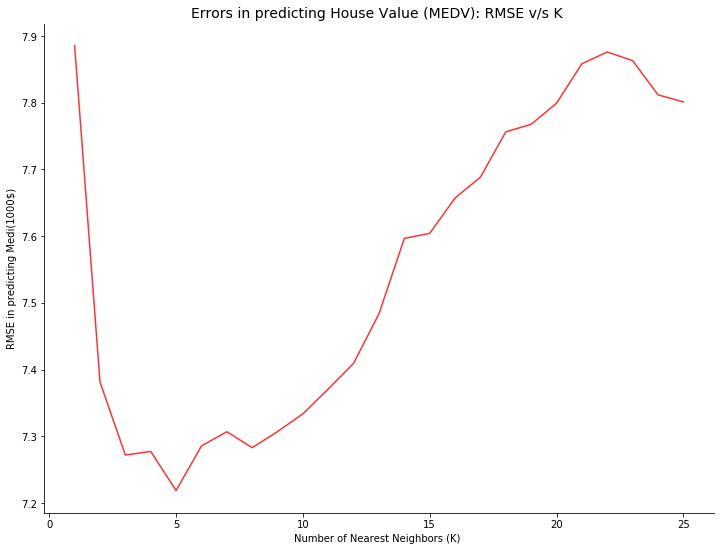

In [187]:
#Plotting true v/s predicted price
#Fetch the data
x = list(range(1,26))
y = rmse_list

#Prepare the plot and axis
plt.figure(figsize =(12,9))
plt.xlabel("Number of Nearest Neighbors (K) ")
plt.ylabel("RMSE in predicting Medi(1000$)")
plt.title("Errors in predicting House Value (MEDV): RMSE v/s K ", size=14)

#Plot the data
plt.plot(x,y,color='red', alpha =0.8)

#Removing the axes
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    

#### Comments
- I think a reasonable choice would be K=5. 
- This is because after looking at 5 neighbors, the mean RMSE value tends to go up.
- This suggests that after looking at 5 nearest neighbors, looking for more nearest points tends to throw off the accuracy for a given test data point.

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

In [ ]:
#Fix K as previous optimal value
#Start with p = 1 features, Add another feature 
#For particular p, choose among all the rmse which is lowest using cross-validation

#### End of File 